In [1]:
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('banknotes.csv', sep=',')
df.index.names = ['id']
df.shape

(200, 7)

In [39]:
df.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
id,,,,,,,
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


In [42]:
df.rename(columns={
            'conterfeit':'Status',
            'H_l':'Left',
            'H_r':'Right',
            'dist_l':'Bottom',
            'dist_up':'Top',
            'Diag':'Diagonal'},
        inplace=True)
df.head()

,Status,Length,Left,Right,Bottom,Top,Diagonal
id,,,,,,,
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


In [43]:
df.dtypes

Status        int64
Length      float64
Left        float64
Right       float64
Bottom      float64
Top         float64
Diagonal    float64
dtype: object

In [44]:
%%time
for col in list(df.columns):
    df[col] = df[col].apply(lambda x: str(x).replace(',', '.')).astype('float64')

Wall time: 9 ms


In [45]:
df.dtypes

Status      float64
Length      float64
Left        float64
Right       float64
Bottom      float64
Top         float64
Diagonal    float64
dtype: object

In [46]:
df.describe()

,Status,Length,Left,Right,Bottom,Top,Diagonal
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.500000,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,0.501255,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,0.000000,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,0.000000,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,0.500000,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,1.000000,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,1.000000,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


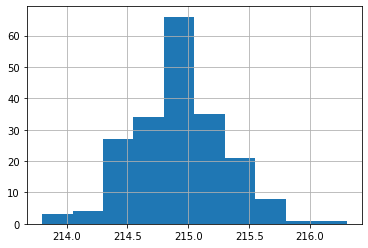

In [47]:
df['Length'].hist()

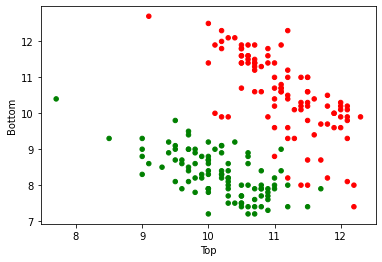

In [50]:
colors = {0:'green', 1:'red'}
df.plot.scatter(x='Top', y='Bottom', c=df['Status'].replace(colors))

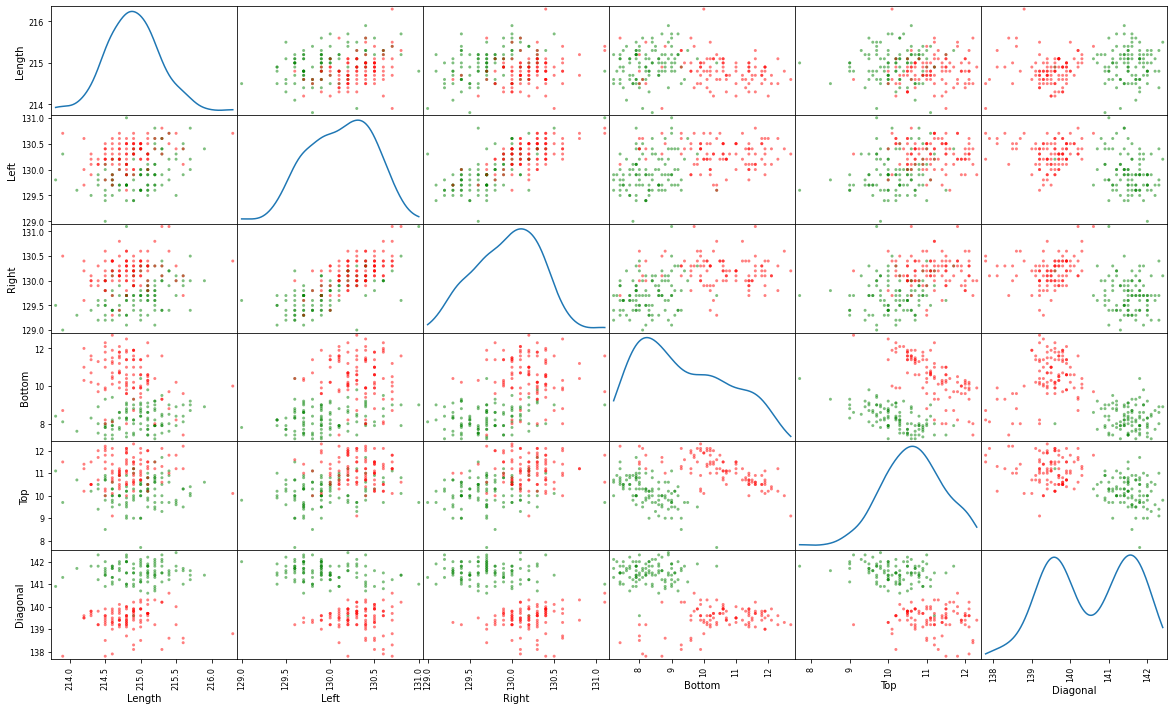

In [57]:
pd.plotting.scatter_matrix(df.drop(columns=['Status'], axis=1), figsize=(20, 12), diagonal='kde', c=df['Status'].replace(colors));

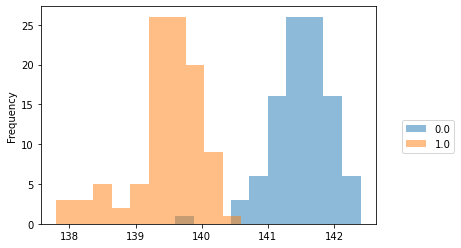

In [72]:
df.groupby('Status')['Diagonal'].plot.hist(alpha=.5)
plt.legend(bbox_to_anchor=(1.25, 0.5))